In [1]:
#encoding:utf8

from os import name
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d import Axes3D

class GaussianKernel:
    '''
    sigma: the standard deviation of the gaussian convolution kernel
    width: the width of the convolution kernel
    step: used for the visual of the guassian convolution kernel, 
          step control the smoothness of the visual effect.
    '''
    def __init__(self, sigma, width, step=1.):
        self.sigma  = name
        self.width  = width
        self.step   = step
        self.kernel = None
    
    '''
    Produces a 2D gaussian kernel of standard deviation sigma and kernel size width.
    The kernel size must be odd. 
    '''
    def gaussian_kernel_2d(self):
        if self.width == 1:
            self.kernel = np.ones((1, 1))
            return

        kernel_radius = np.floor(self.width >> 1)
        ax            = np.arange(-kernel_radius, kernel_radius + 1., self.step, dtype=np.float32)
        xx, yy        = np.meshgrid(ax, ax)
        kernel        = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
        kernel_sum    = np.sum(kernel)
        self.kernel   = (kernel / kernel_sum)

    '''
    Produces a 1D gaussian kernel of standard deviation sigma and size width.
    The kernel size must be odd.
    '''
    def gaussian_kernel_1d(self):
        if self.width == 1:
            self.kernel =  np.ones(1)
            return

        kernel_radius = np.floor(self.width >> 1)
        ax            = np.arange(-kernel_radius, kernel_radius + 1., self.step, dtype=np.float32)
        kernel        = np.exp(-(ax**2) / (2. * sigma**2))
        kernel_sum    = np.sum(kernel)
        self.kernel = (kernel / kernel_sum).reshape(1,kernel.shape[0])

    def gaussian_kernel_2d_visual(self):
        kernel_radius = np.floor(self.width >> 1)
        axis = np.arange(-kernel_radius, kernel_radius + 1., self.step, dtype=np.float32)
        X, Y = np.meshgrid(axis, axis) 

        xmajorLocator = MultipleLocator(1)
        ymajorLocator = MultipleLocator(1)
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        plt.title("2D gaussian kernel for sigma=%.1f,width=%d" % (sigma, width))
        ax.xaxis.set_major_locator(xmajorLocator)
        ax.yaxis.set_major_locator(ymajorLocator)
        ax.plot_surface(X, Y, self.kernel, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
        ax.set_zlim(0, np.max(self.kernel))

        plt.subplot(1, 2, 2)
        plt.axis('off')
        plt.imshow(self.kernel, interpolation="nearest", cmap=plt.cm.gray)

        plt.show()

    def gaussian_kernel_1d_visual(self):
        kernel_radius = np.floor(self.width >> 1)
        X = np.arange(-kernel_radius, kernel_radius + 1., self.step, dtype=np.float32)
        
        fig = plt.figure(figsize=(10, 8))
        ax = plt.subplot(1, 2, 1)
        plt.title("1D gaussian kernel for sigma=%.1f,width=%d" % (sigma, width))
        plt.plot(X, self.kernel[0])

        plt.subplot(1, 2, 2)
        plt.axis('off')
        plt.imshow(self.kernel, interpolation="nearest", cmap=plt.cm.gray)

        plt.show()

    def getKernel(self):
        return self.kernel


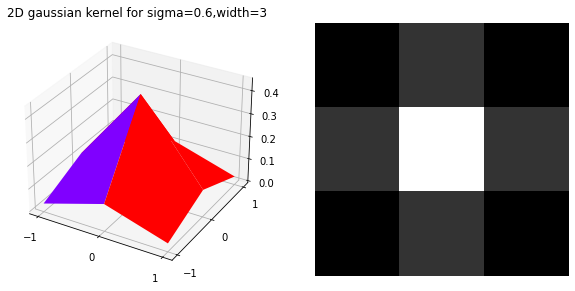

In [2]:
sigma = 0.6
width = 3
gk = GaussianKernel(sigma, width)
gk.gaussian_kernel_2d()
gk.gaussian_kernel_2d_visual()

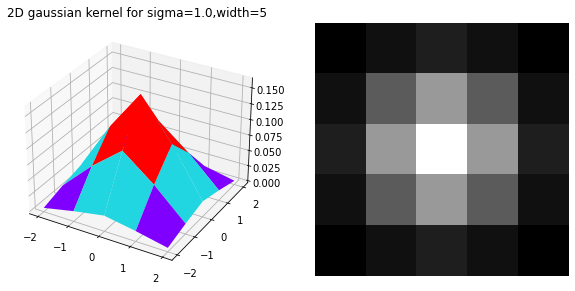

In [3]:
sigma = 1
width = 5
gk = GaussianKernel(sigma, width)
gk.gaussian_kernel_2d()
gk.gaussian_kernel_2d_visual()

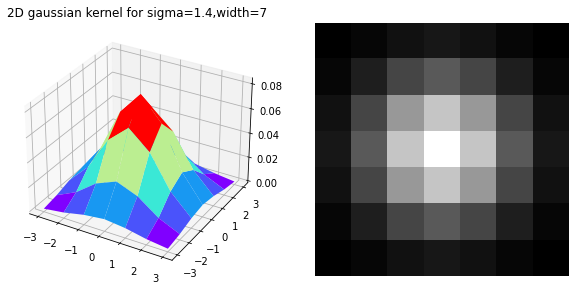

In [4]:
sigma = 1.4
width = 7
gk = GaussianKernel(sigma, width)
gk.gaussian_kernel_2d()
gk.gaussian_kernel_2d_visual()